In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# Đọc dữ liệu từ tập tin CSV với các tùy chọn
df = pd.read_csv('SAMSUNG.csv', header=0, parse_dates=[0], index_col=0)
# In ra 5 dòng đầu tiên của DataFrame
print(df.head())
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index


       Date  Price   Open   High    Low    Vol. Change %
0  1/2/2018  51.02  51.38  51.40  50.78   8.46M    0.12%
1  1/3/2018  51.62  52.54  52.56  51.42   9.92M    1.18%
2  1/4/2018  51.08  52.12  52.18  50.64  11.64M   -1.05%
3  1/5/2018  52.12  51.30  52.12  51.20   9.33M    2.04%
4  1/8/2018  52.02  52.40  52.52  51.50   8.36M   -0.19%


In [25]:
# 2.  chia train test validate theo tỉ lệ 7:3
# Split the data into training, testing
train_size = int(0.7 * len(df))
test_size = int(0.3 * len(df))


X2D = df[['High']] # Biến độc lập theo mảng 2 chiều
Y2D = df[['Price']] # Biến phụ thuộc theo mảng 2 chiều


In [26]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

y_train = Y2D[:train_size]
x_train = X2D[:train_size]
y_test = Y2D[train_size:]
x_test = X2D[train_size:]
y_train_index = y_train.index # lấy ra index trước khi đổi nó về mảng 2 chiều ( phục vụ plot )
y_train = Y2D[:train_size].values.ravel()

# Tạo mô hình SVR với kernel RBF
model = SVR(kernel='rbf')
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],             # Ví dụ các giá trị cho C
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],  # Ví dụ các giá trị cho gamma
    'epsilon': [0.001, 0.01, 0.1, 1, 10]      # Ví dụ các giá trị cho epsilon
}

# Tạo đối tượng GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Huấn luyện mô hình sử dụng grid search
svr_rbf = grid_search.fit(x_train,y_train)

# In ra kết quả tốt nhất
print("Best parameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)


Best parameters: {'C': 1000, 'epsilon': 0.001, 'gamma': 0.001}
Best score: 0.2804811476954946


In [27]:


y_pred = svr_rbf.predict(x_test)
y_pred


array([72.44482578, 72.03634226, 69.90188944, 69.29556382, 70.50984215,
       70.0031032 , 69.49748899, 69.39650338, 69.80072094, 71.11935876,
       70.20566559, 70.30701368, 69.80072094, 70.50984215, 69.59852055,
       69.49748899, 69.19467041, 69.59852055, 69.80072094, 69.39650338,
       68.79155928, 68.59028138, 68.89226763, 68.08789347, 67.78700951,
       67.58664617, 67.38646163, 66.98662101, 68.28871077, 67.98755338,
       66.58746955, 66.38814574, 67.28643582, 66.68719391, 67.58664617,
       66.58746955, 65.98998741, 65.98998741, 64.79918894, 64.79918894,
       66.88676931, 66.88676931, 67.68680538, 67.68680538, 66.38814574,
       66.18898605, 65.59246029, 65.59246029, 64.79918894, 65.98998741,
       66.58746955, 67.18645397, 67.98755338, 66.88676931, 67.68680538,
       68.08789347, 66.98662101, 66.28854557, 66.48778694, 66.18898605,
       67.08651579, 66.78696039, 66.28854557, 66.58746955, 65.69178435,
       64.99729304, 64.50228685, 63.71194398, 62.13646971, 61.54

In [28]:
last_row = df.tail(1)
last_data = last_row['Price'].values.reshape(-1,1)
last_data

array([[72.6]])

In [29]:
# tạo mảng chứa giá trị predict của 30 ngày tiếp theo
x_next_30_days = []
# predict giá Close 30 ngày tiếp theo dựa vào giá Close của ngày trước đó
for i in range(30):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_30_days.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)
x_next_30_days

[array([71.93430622]),
 array([71.25600023]),
 array([70.56666567]),
 array([69.86816056]),
 array([69.1625562]),
 array([68.45206654]),
 array([67.73897258]),
 array([67.02554745]),
 array([66.31398699]),
 array([65.60635045]),
 array([64.90451404]),
 array([64.21013875]),
 array([63.52465235]),
 array([62.84924419]),
 array([62.18487075]),
 array([61.53226918]),
 array([60.89197654]),
 array([60.26435214]),
 array([59.64960125]),
 array([59.04779853]),
 array([58.45891012]),
 array([57.88281385]),
 array([57.3193171]),
 array([56.76817222]),
 array([56.22908962]),
 array([55.70174859]),
 array([55.18580623]),
 array([54.68090456]),
 array([54.18667618]),
 array([53.70274876])]

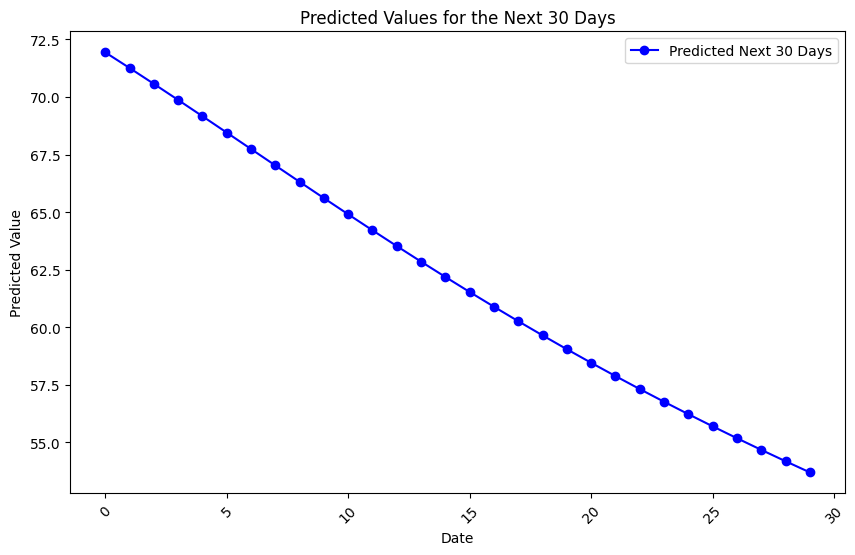

In [30]:

# Vẽ biểu đồ
plt.figure(figsize=(10, 6)) # Set the figure size
plt.plot(x_next_30_days, marker='o', color='b', label='Predicted Next 30 Days')

# Đặt tiêu đề và nhãn
plt.title('Predicted Values for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [31]:
# Chuyển cột predict price thành mảng 2 chiều
y_pred = y_pred.reshape(-1,1)

In [32]:
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error
# 7. Đánh giá độ chính xác test bằng RMSE, MAE , MAPE
# RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)

Testing RMSE: 0.4435819062434307
Testing MAPE: 0.005593996118046206
Testing MAE: 0.36158107252672594


In [33]:
# Tạo index cho 30 ngày tiếp theo
last_index =  df.index[-1]
next_30_dates = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

Testing RMSE: 0.4435819062434307
Testing MAPE: 0.005593996118046206
Testing MAE: 0.36158107252672594


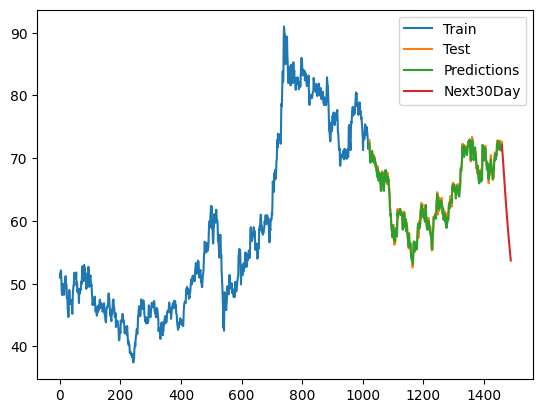

In [34]:
# 8. Tính RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test,y_pred)
print('Testing MAPE:', test_mape)
# MAE
test_mae = mean_absolute_error(y_test,y_pred)
print('Testing MAE:', test_mae)

# 9.Vẽ hình

plt.plot(y_train_index, y_train)
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, y_pred)
plt.plot(next_30_dates,x_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()